In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import rasterio as rio
import seaborn as sns
import statsmodels.graphics.api as smg
import warnings
warnings.filterwarnings("ignore")

Forma:  (6998, 11757)
Valores únicos:  [1]


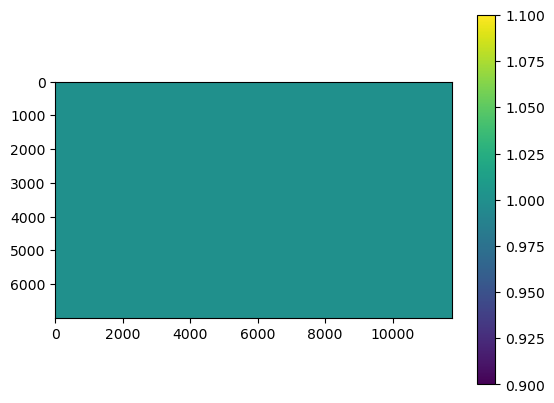

In [2]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Mov_mart\mov_binario.tif')
inventario=raster.read(1)
inventario=np.where(inventario == 65535,0,1)
plt.imshow(inventario)
plt.colorbar();

print('Forma: ', inventario.shape)
print('Valores únicos: ', np.unique(inventario))

In [3]:
print('Valores originales únicos:', np.unique(inventario))

Valores originales únicos: [1]


Forma: (6998, 11757)
Valores únicos: [0 1]
Valor NoData: 0.0


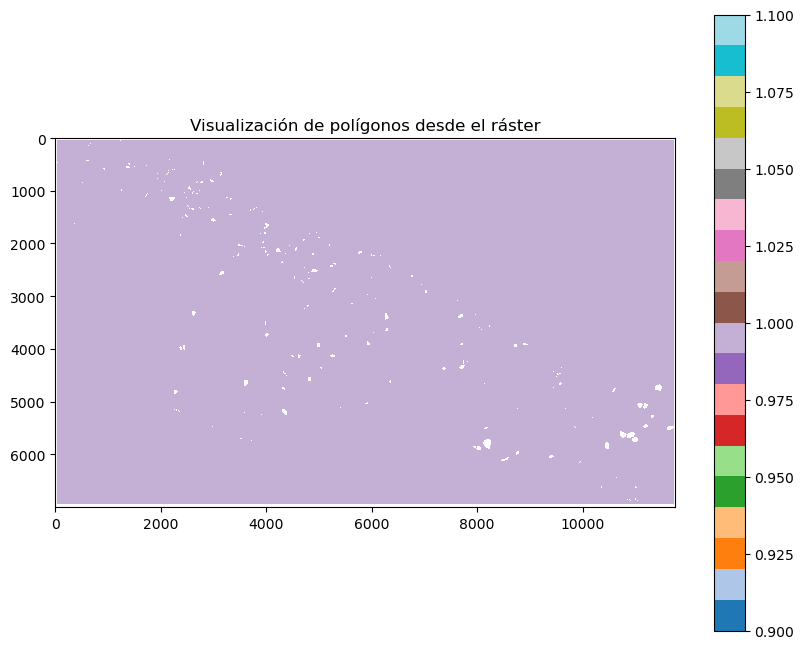

In [4]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

# Cargar el ráster
ruta = r'C:\Users\USUARIO\Desktop\Prueba\Mov_mart\mov_binario.tif'

with rio.open(ruta) as src:
    inventario = src.read(1)
    nodata = src.nodata

print("Forma:", inventario.shape)
print("Valores únicos:", np.unique(inventario))
print("Valor NoData:", nodata)

# Aplicar máscara si hay NoData
if nodata is not None:
    inventario = np.where(inventario == nodata, np.nan, inventario)

# Visualización
plt.figure(figsize=(10, 8))
plt.imshow(inventario, cmap='tab20', interpolation='none')
plt.colorbar()
plt.title('Visualización de polígonos desde el ráster')
plt.show()

Valor NoData: 0.0


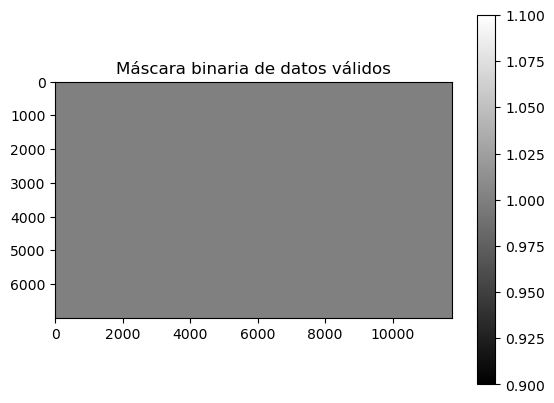

In [5]:
nodata = raster.nodata
print('Valor NoData:', nodata)

# Máscara binaria: 1 donde hay datos válidos, 0 donde hay NoData
mascara = np.where(inventario == nodata, 0, 1)

plt.imshow(mascara, cmap='gray')
plt.title('Máscara binaria de datos válidos')
plt.colorbar()

Forma:  (7969, 13231)
Valores únicos:  [1.]


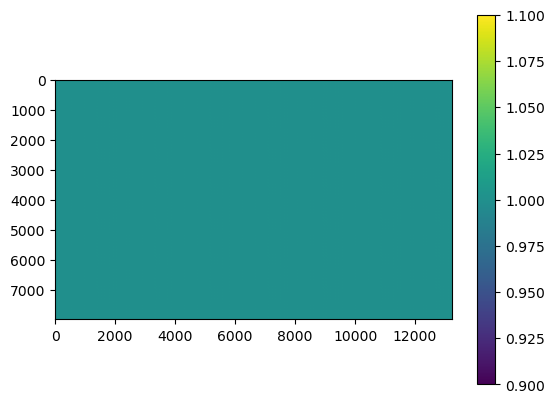

In [6]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif')
msk=raster.read_masks(1)
msk=np.where(msk==0,np.nan,1)
plt.imshow(msk)
plt.colorbar();

print('Forma: ', msk.shape)
print('Valores únicos: ', np.unique(msk))

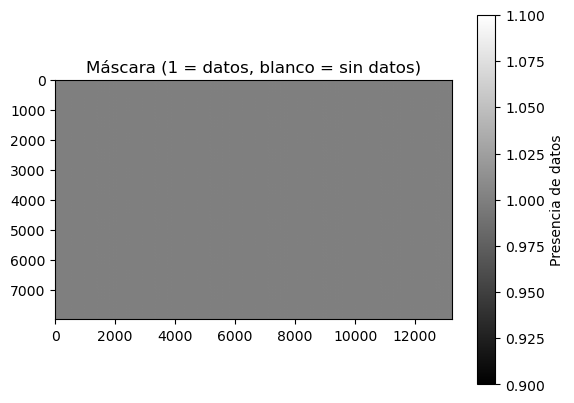

In [7]:
plt.imshow(msk, cmap='gray')
plt.title("Máscara (1 = datos, blanco = sin datos)")
plt.colorbar(label='Presencia de datos')
plt.show()

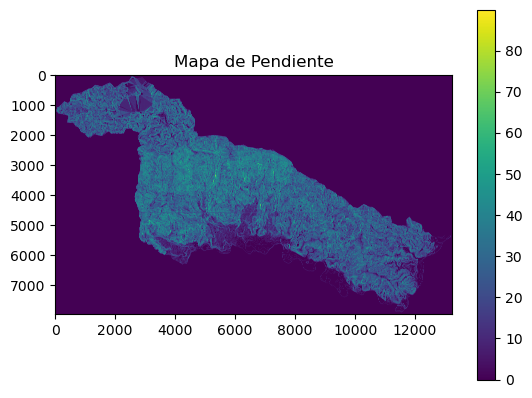

In [8]:
import rasterio as rio
import matplotlib.pyplot as plt

raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif')
pendiente = raster.read(1)

plt.imshow(pendiente, cmap='viridis')
plt.colorbar()
plt.title("Mapa de Pendiente")
plt.show()


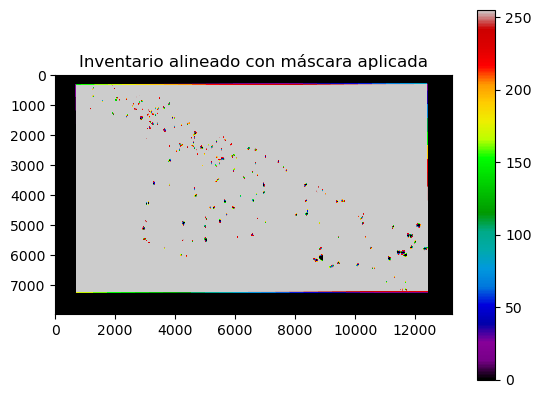

In [9]:
import numpy as np
import rasterio as rio
from rasterio.warp import reproject, Resampling
import matplotlib.pyplot as plt

# Abrir ráster de referencia (pendiente)
with rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif') as src_ref:
    ref_shape = src_ref.read(1).shape
    ref_transform = src_ref.transform
    ref_crs = src_ref.crs
    msk = src_ref.read_masks(1)
    msk = np.where(msk == 0, np.nan, 1)

# Abrir ráster a alinear (inventario)
with rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Mov_mart\Mov_marte.tif') as src_inv:
    inventario = src_inv.read(1)
    aligned_inv = np.empty(ref_shape, dtype=inventario.dtype)

    reproject(
        source=inventario,
        destination=aligned_inv,
        src_transform=src_inv.transform,
        src_crs=src_inv.crs,
        dst_transform=ref_transform,
        dst_crs=ref_crs,
        resampling=Resampling.nearest
    )

# Aplicar la máscara
inventario1 = aligned_inv * msk

# Visualizar
plt.imshow(inventario1, cmap='nipy_spectral')
plt.colorbar()
plt.title("Inventario alineado con máscara aplicada")
plt.show()

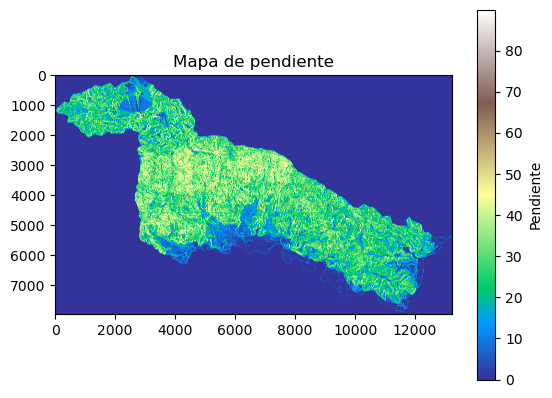

In [10]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

# Abrir el ráster
with rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif') as raster:
    slope = raster.read(1).astype(float)  # leer la banda 1 y convertir a float para poder tener NaNs

# Reemplazar valores negativos con NaN
slope = np.where(slope < 0, np.nan, slope)

# Visualizar
plt.imshow(slope, cmap='terrain')
plt.colorbar(label='Pendiente')
plt.title("Mapa de pendiente")
plt.show()

Forma:  (7969, 13231)
Valores únicos:  [0.0000000e+00 1.2363964e-03 2.4727928e-03 ... 8.9925980e+01 8.9925987e+01
 8.9926003e+01]


numpy.ndarray

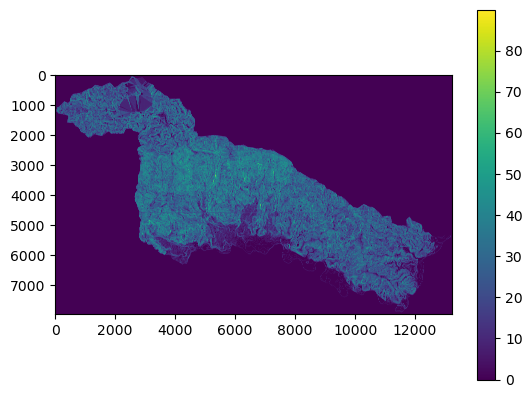

In [11]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif')
slope=raster.read(1)
slope=np.where(slope<0,np.nan,slope)
plt.imshow(slope)
plt.colorbar();

print('Forma: ', slope.shape)
print('Valores únicos: ', np.unique(slope))
type(slope)

Forma:  (7969, 13231)
Valores únicos:  [0.00000000e+00 1.13173148e-04 1.21383986e-04 ... 3.59999664e+02
 3.59999878e+02            nan]


numpy.ndarray

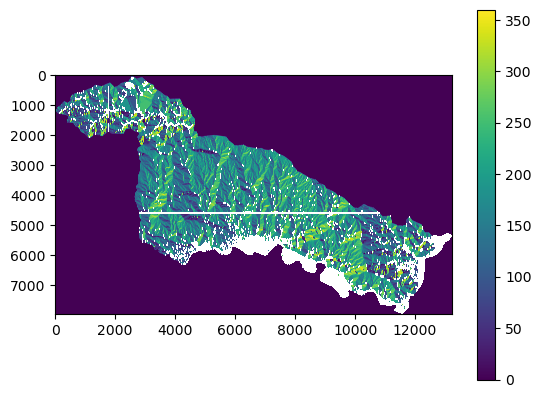

In [12]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Aspecto\Aspect.tif')
aspecto=raster.read(1)
#aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto=np.where(aspecto == aspecto.min(), np.nan, aspecto)
plt.imshow(aspecto)
plt.colorbar()

print('Forma: ', aspecto.shape)
print('Valores únicos: ', np.unique(aspecto))
type(aspecto)

Forma:  (7969, 13231)
Valores únicos:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 19

numpy.ndarray

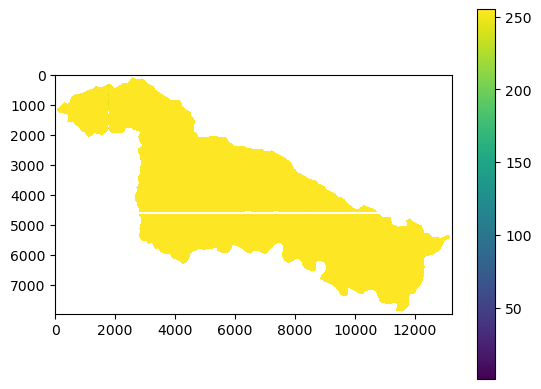

In [13]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo raster
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Curva_vert_hori\curv_verti.tif')
curverti = raster.read(1)

# Reemplazar el valor mínimo por NaN
curverti = np.where(curverti == curverti.min(), np.nan, curverti)

# Mostrar la imagen
plt.imshow(curverti)
plt.colorbar()

# Imprimir información
print('Forma: ', curverti.shape)
print('Valores únicos: ', np.unique(curverti))
type(curverti)

Forma:  (7969, 13231)
Valores únicos:  [ 59.  69. 105. 125. 141. 151. 177. 193. 209. 211. 212. 214. 215. 216.
 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229. 230.
 231. 232. 233. 234. 235. 236. 237. 238. 239. 240. 241. 242. 243. 244.
 245. 246. 247. 248. 249. 250. 251. 252. 253. 254. 255.  nan]


numpy.ndarray

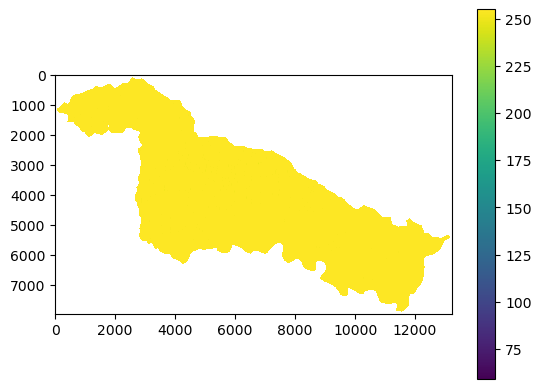

In [14]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo raster
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Curva_vert_hori\Curv_hori.tif')
curvhori = raster.read(1)

# Reemplazar el valor mínimo por NaN
curvhori = np.where(curvhori == curvhori.min(), np.nan, curvhori)

# Mostrar la imagen
plt.imshow(curvhori)
plt.colorbar()

# Imprimir información
print('Forma: ', curvhori.shape)
print('Valores únicos: ', np.unique(curvhori))
type(curvhori)

Forma:  (7991, 13271)
Valores únicos:  [ 2.  4.  5.  7. 11. nan]


numpy.ndarray

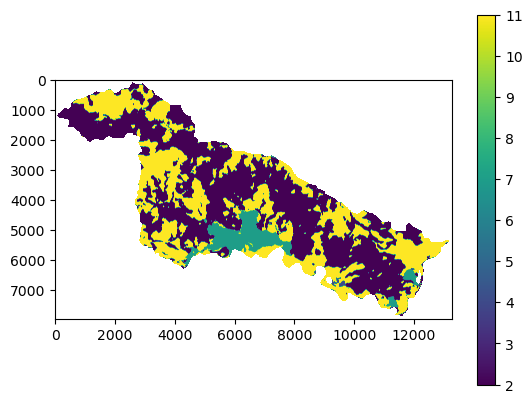

In [15]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo raster
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\cover\cov_reclasificado.tif')
cobertura = raster.read(1)

# Reemplazar el valor mínimo por NaN
cobertura = np.where(cobertura == cobertura.min(), np.nan, cobertura)

# Mostrar la imagen
plt.imshow(cobertura)
plt.colorbar()

# Imprimir información
print('Forma: ', cobertura.shape)
print('Valores únicos: ', np.unique(cobertura))
type(cobertura)


Forma:  (7969, 13231)
Valores únicos:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 19

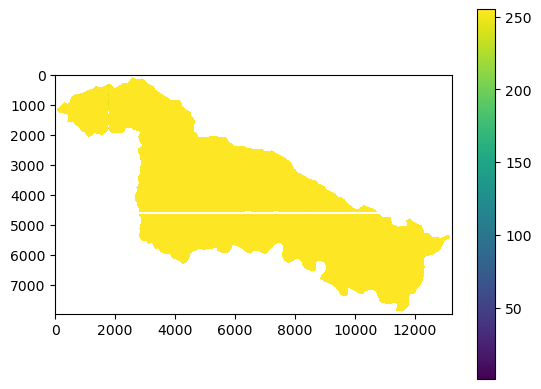

In [16]:
curverti1 = msk * curverti
plt.imshow(curverti1)
plt.colorbar();

print('Forma: ', curverti1.shape)
print('Valores únicos: ', np.unique(curverti1))

Forma:  (7969, 13231)
Valores únicos:  [ 59.  69. 105. 125. 141. 151. 177. 193. 209. 211. 212. 214. 215. 216.
 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229. 230.
 231. 232. 233. 234. 235. 236. 237. 238. 239. 240. 241. 242. 243. 244.
 245. 246. 247. 248. 249. 250. 251. 252. 253. 254. 255.  nan]


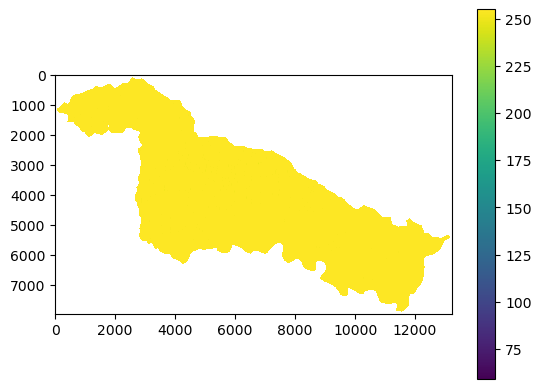

In [17]:
curvhori1 = msk * curvhori
plt.imshow(curvhori1)
plt.colorbar();

print('Forma: ', curvhori1.shape)
print('Valores únicos: ', np.unique(curvhori1))

Forma de cobertura: (7991, 13271)
Forma de msk: (7969, 13231)
Forma:  (7969, 13231)
Valores únicos:  [ 2.  4.  5.  7. 11. nan]


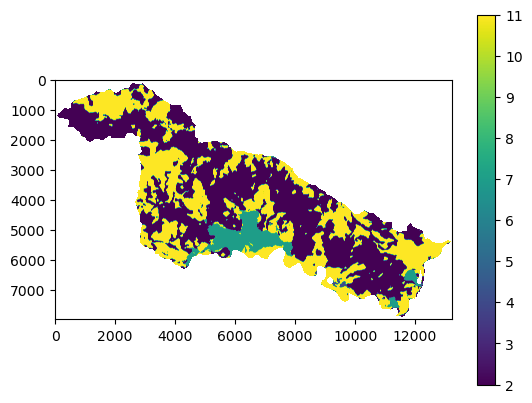

In [18]:
# Verifica las formas primero
print("Forma de cobertura:", cobertura.shape)
print("Forma de msk:", msk.shape)

# Obtener forma de la máscara
rows, cols = msk.shape

# Recortar cobertura al tamaño de la máscara
cobertura_recortada = cobertura[:rows, :cols]

# Aplicar la máscara
cobertura1 = msk * cobertura_recortada

# Mostrar resultado
plt.imshow(cobertura1)
plt.colorbar()
print('Forma: ', cobertura1.shape)
print('Valores únicos: ', np.unique(cobertura1))




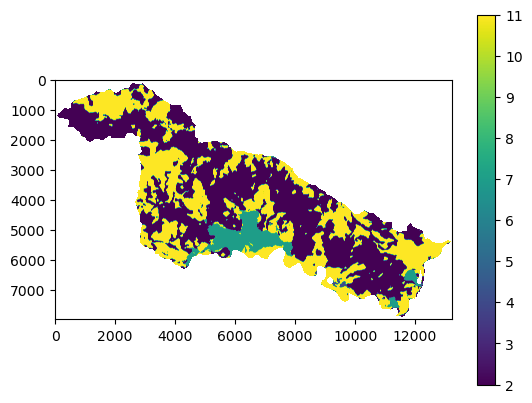

Forma: (7969, 13231)
Valores únicos: [ 2.  4.  5.  7. 11. nan]


In [19]:
# Obtener el mínimo de filas y columnas
rows = min(msk.shape[0], cobertura.shape[0])
cols = min(msk.shape[1], cobertura.shape[1])

# Recortar ambos arrays
msk_cropped = msk[:rows, :cols]
cobertura_cropped = cobertura[:rows, :cols]

# Multiplicar
cobertura1 = msk_cropped * cobertura_cropped

# Mostrar resultado
import matplotlib.pyplot as plt
plt.imshow(cobertura1)
plt.colorbar()
plt.show()

print('Forma:', cobertura1.shape)
print('Valores únicos:', np.unique(cobertura1))



Forma:  (7969, 13231)
Valores únicos:  [ 2.  4.  5.  7. 11. nan]


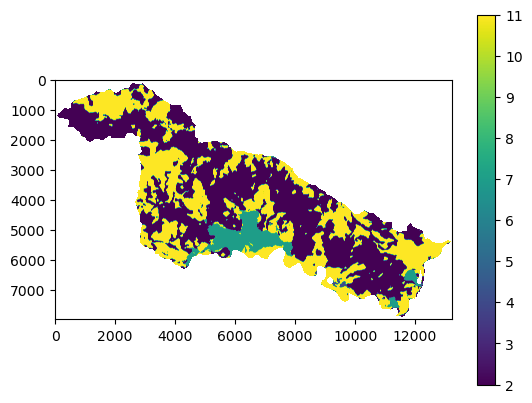

In [20]:
# Multiplicar las matrices recortadas
cobertura1 = msk_cropped * cobertura_cropped

# Mostrar la imagen resultante
plt.imshow(cobertura1)
plt.colorbar()

# Imprimir información
print('Forma: ', cobertura1.shape)
print('Valores únicos: ', np.unique(cobertura1))


In [21]:
print(flujo.shape)
print(np.nanmin(flujo), np.nanmax(flujo))  # Esto te muestra el rango de valores

NameError: name 'flujo' is not defined

(105437839,)

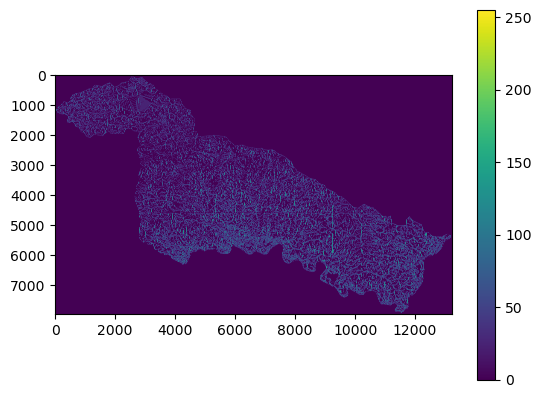

In [22]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\flujo\flujo_ac_lad.tif')
flujo=raster.read(1)
flujo=np.where(flujo<0,np.nan,flujo)
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
plt.imshow(flujo)
plt.colorbar()
flujo.shape
flujo_vector_MenM.shape

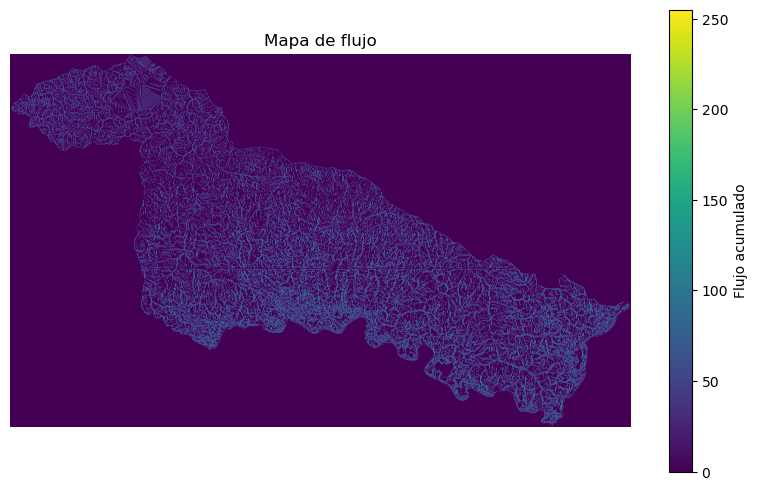

In [23]:
plt.figure(figsize=(10, 6))
plt.imshow(flujo, cmap='viridis')  # Puedes probar otros colormaps también
plt.colorbar(label='Flujo acumulado')
plt.title('Mapa de flujo')
plt.axis('off')
plt.show()

Forma:  (7969, 13231)
Valores únicos:  [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 18

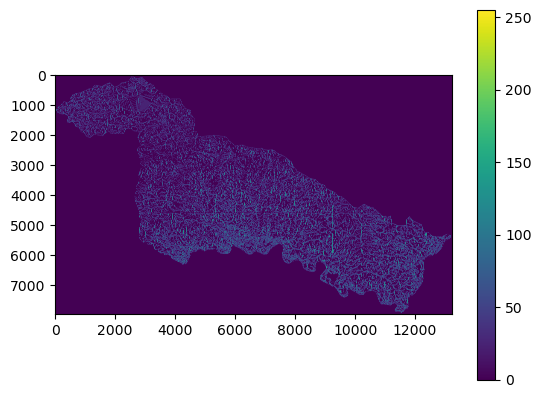

In [24]:
flujo1 = msk*flujo
plt.imshow(flujo1)
plt.colorbar();

print('Forma: ', flujo1.shape)
print('Valores únicos: ', np.unique(flujo1))

Forma:  (7969, 13231)
Valores únicos:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 19

numpy.ndarray

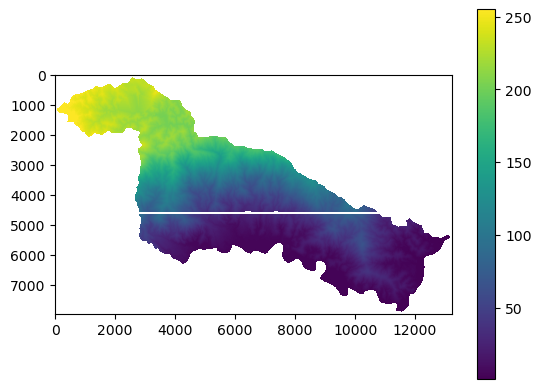

In [25]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\eleva\elevation.tif')
elevacion=raster.read(1)
elevacion=np.where(elevacion==0,np.nan,elevacion)
plt.imshow(elevacion)
plt.colorbar();

print('Forma: ', elevacion.shape)
print('Valores únicos: ', np.unique(elevacion))
type(elevacion)

Forma:  (7969, 13231)
Valores únicos:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 19

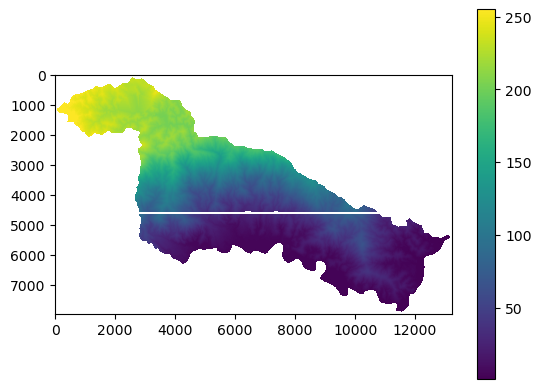

In [26]:
elevacion1 = msk*elevacion
plt.imshow(elevacion1)
plt.colorbar();

print('Forma: ', elevacion1.shape)
print('Valores únicos: ', np.unique(elevacion1))

Forma:  (7969, 13231)
Valores únicos:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


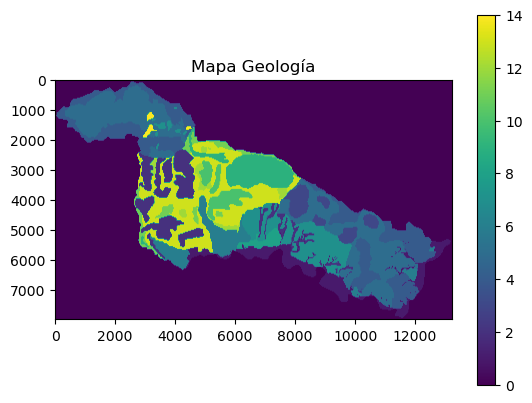

In [27]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\geolo_pro\geologia_reproyectada.tif')
geologia=raster.read(1)
geologia=np.where(geologia == 15,np.nan,geologia)
plt.imshow(geologia)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa Geología')
print('Forma: ', geologia.shape)
print('Valores únicos: ', np.unique(geologia))

Forma:  (7969, 13231)
Valores únicos:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


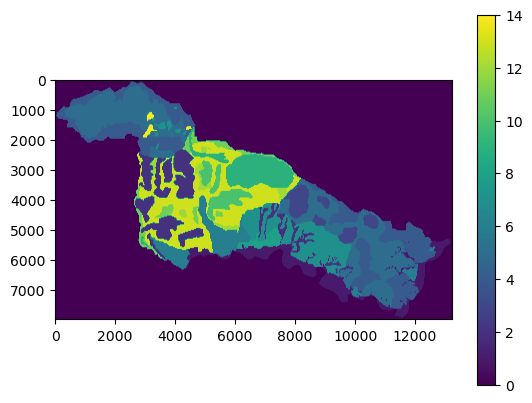

In [28]:
geologia1 = msk*geologia
plt.imshow(geologia1)
plt.colorbar();

print('Forma: ', geologia1.shape)
print('Valores únicos: ', np.unique(geologia1))

In [29]:
inventariovector = inventario1.ravel()
print('Longitud inventariovector: ', inventariovector.shape[0])

slopevector = slope.ravel()
print('Longitud slopevector: ', slopevector.shape[0])

aspectovector = aspecto.ravel()
print('Longitud aspectovector: ', aspectovector.shape[0])

curvertivector = curverti1.ravel()
print('Longitud curvertivector: ', curvertivector.shape[0])

curvhorivector = curvhori1.ravel()
print('Longitud curvhorivector: ', curvhorivector.shape[0])

flujovector = flujo1.ravel()
print('Longitud flujovector: ', flujovector.shape[0])

elevacionvector = elevacion1.ravel()
print('Longitud elevacionvector: ', elevacionvector.shape[0])

geologiavector = geologia1.ravel()
print('Longitud geologiavector: ', geologiavector.shape[0])

# Aquí agregamos cobertura1
cobertura1vector = cobertura1.ravel()
print('Longitud cobertura1vector: ', cobertura1vector.shape[0])


Longitud inventariovector:  105437839
Longitud slopevector:  105437839
Longitud aspectovector:  105437839
Longitud curvertivector:  105437839
Longitud curvhorivector:  105437839
Longitud flujovector:  105437839
Longitud elevacionvector:  105437839
Longitud geologiavector:  105437839
Longitud cobertura1vector:  105437839


In [30]:
import numpy as np

# Paso 1: Asegúrate de que todos los vectores están definidos
inventariovector = inventario1.ravel()
slopevector = slope.ravel()
aspectovector = aspecto.ravel()
curvertivector = curverti1.ravel()
curvhorivector = curvhori1.ravel()
flujovector = flujo1.ravel()
elevacionvector = elevacion1.ravel()
geologiavector = geologia1.ravel()
cobertura1vector = cobertura1.ravel()  # <-- agregado

# Paso 2: Apilamos todos los vectores en un array 2D (ahora con cobertura1vector)
stack = np.stack([
    inventariovector,
    slopevector,
    aspectovector,
    curvertivector,
    curvhorivector,
    flujovector,
    elevacionvector,
    geologiavector,
    cobertura1vector   # <-- agregado
], axis=1)

# Paso 3: Creamos una máscara que elimina filas con al menos un NaN
mask = ~np.any(np.isnan(stack), axis=1)

# Paso 4: Aplicamos la máscara a todos los datos a la vez
stack_clean = stack[mask]

# Paso 5: Separar nuevamente los vectores con sufijo MenM
inventariovectorMenM   = stack_clean[:, 0]
slopevectorMenM        = stack_clean[:, 1]
aspectovectorMenM      = stack_clean[:, 2]
curvertivectorMenM     = stack_clean[:, 3]
curvhorivectorMenM     = stack_clean[:, 4]
flujovectorMenM        = stack_clean[:, 5]
elevacionvectorMenM    = stack_clean[:, 6]
geologiavectorMenM     = stack_clean[:, 7]
cobertura1vectorMenM   = stack_clean[:, 8]   # <-- agregado

print('Longitud final (sin NaN en ninguna capa):', inventariovectorMenM.shape[0])


Longitud final (sin NaN en ninguna capa): 36180897


In [31]:
# Realizamos el DataFrame con las variables nuevas y sin curvatura, incluyendo Cobertura

diccionario = {
    'Inventario': inventariovectorMenM,
    'Pendiente': slopevectorMenM,
    'Aspectos': aspectovectorMenM,
    'Curvatura vertical': curvertivectorMenM,
    'Curvatura horizontal': curvhorivectorMenM,
    'Flujo Acumulado': flujovectorMenM,
    'Elevación': elevacionvectorMenM,
    'Geología': geologiavectorMenM,
    'Cobertura': cobertura1vectorMenM   # <-- agregado aquí
}

df = pd.DataFrame(diccionario)
print(list(df.columns))

# df.tail(5)


['Inventario', 'Pendiente', 'Aspectos', 'Curvatura vertical', 'Curvatura horizontal', 'Flujo Acumulado', 'Elevación', 'Geología', 'Cobertura']


In [32]:
df.head()

,Inventario,Pendiente,Aspectos,Curvatura vertical,Curvatura horizontal,Flujo Acumulado,Elevación,Geología,Cobertura
0,0.0,0.000000,0.000000,254.0,254.0,0.0,238.0,0.0,2.0
1,0.0,25.097351,133.503098,255.0,255.0,102.0,238.0,0.0,2.0
2,0.0,0.000000,0.000000,255.0,255.0,36.0,238.0,0.0,2.0
3,0.0,0.000000,0.000000,255.0,255.0,0.0,238.0,0.0,2.0
4,0.0,21.167547,134.086761,255.0,255.0,234.0,238.0,0.0,2.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36180897 entries, 0 to 36180896
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Inventario            float64
 1   Pendiente             float64
 2   Aspectos              float64
 3   Curvatura vertical    float64
 4   Curvatura horizontal  float64
 5   Flujo Acumulado       float64
 6   Elevación             float64
 7   Geología              float64
 8   Cobertura             float64
dtypes: float64(9)
memory usage: 2.4 GB


In [35]:
df['Inventario'] = df['Inventario'].astype(int)
df['Geología'] = df['Geología'].astype(int)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36180897 entries, 0 to 36180896
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Inventario            int32  
 1   Pendiente             float64
 2   Aspectos              float64
 3   Curvatura vertical    float64
 4   Curvatura horizontal  float64
 5   Flujo Acumulado       float64
 6   Elevación             float64
 7   Geología              int32  
 8   Cobertura             float64
dtypes: float64(7), int32(2)
memory usage: 2.2 GB


In [37]:
print(df['Inventario'].unique())

[  0 255]


In [38]:
df['Inventario'] = df['Inventario'].apply(lambda x: 1 if x == 255 else 0)

In [39]:
print(df['Inventario'].unique())

[0 1]


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36180897 entries, 0 to 36180896
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Inventario            int64  
 1   Pendiente             float64
 2   Aspectos              float64
 3   Curvatura vertical    float64
 4   Curvatura horizontal  float64
 5   Flujo Acumulado       float64
 6   Elevación             float64
 7   Geología              int32  
 8   Cobertura             float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 2.3 GB


In [41]:
df['Inventario'] = df['Inventario'].astype('int32')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36180897 entries, 0 to 36180896
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Inventario            int32  
 1   Pendiente             float64
 2   Aspectos              float64
 3   Curvatura vertical    float64
 4   Curvatura horizontal  float64
 5   Flujo Acumulado       float64
 6   Elevación             float64
 7   Geología              int32  
 8   Cobertura             float64
dtypes: float64(7), int32(2)
memory usage: 2.2 GB


In [43]:
print(df['Inventario'].unique())

[0 1]


In [44]:
df.head()

,Inventario,Pendiente,Aspectos,Curvatura vertical,Curvatura horizontal,Flujo Acumulado,Elevación,Geología,Cobertura
0,0,0.000000,0.000000,254.0,254.0,0.0,238.0,0,2.0
1,0,25.097351,133.503098,255.0,255.0,102.0,238.0,0,2.0
2,0,0.000000,0.000000,255.0,255.0,36.0,238.0,0,2.0
3,0,0.000000,0.000000,255.0,255.0,0.0,238.0,0,2.0
4,0,21.167547,134.086761,255.0,255.0,234.0,238.0,0,2.0


In [45]:
import pandas as pd

# 1. Crea dos DataFrames según el valor de inventario
df_pos = df[df["Inventario"] == 1]
df_neg = df[df["Inventario"] == 0]

# 2. Toma una muestra del 10% del grupo negativo
df_neg_sample = df_neg.sample(frac=0.1, random_state=42)

# 3. Junta los dos
df1 = pd.concat([df_pos, df_neg_sample], ignore_index=True)

# Verifica resultado
print(df1["Inventario"].value_counts())
df1.info()

Inventario
1    34700294
0      148060
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34848354 entries, 0 to 34848353
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Inventario            int32  
 1   Pendiente             float64
 2   Aspectos              float64
 3   Curvatura vertical    float64
 4   Curvatura horizontal  float64
 5   Flujo Acumulado       float64
 6   Elevación             float64
 7   Geología              int32  
 8   Cobertura             float64
dtypes: float64(7), int32(2)
memory usage: 2.1 GB


In [47]:
df1 = pd.concat([
    df[df["Inventario"] == 1],                      # Todas las filas con inventario == 1
    df[df["Inventario"] == 0].sample(frac=0.05)      # 5% aleatorio de filas con inventario == 0
])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34774324 entries, 134813 to 27908680
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Inventario            int32  
 1   Pendiente             float64
 2   Aspectos              float64
 3   Curvatura vertical    float64
 4   Curvatura horizontal  float64
 5   Flujo Acumulado       float64
 6   Elevación             float64
 7   Geología              int32  
 8   Cobertura             float64
dtypes: float64(7), int32(2)
memory usage: 2.3 GB


In [48]:
resumen=df1.describe().T
print(resumen)

                           count        mean        std   min         25%  \
Inventario            34774324.0    0.997871   0.046091   0.0    1.000000   
Pendiente             34774324.0   25.895412  10.917353   0.0   18.237238   
Aspectos              34774324.0  170.305999  78.260679   0.0  115.005234   
Curvatura vertical    34774324.0  254.871691   1.285049   1.0  255.000000   
Curvatura horizontal  34774324.0  254.928942   0.645113  59.0  255.000000   
Flujo Acumulado       34774324.0   24.691568  59.779305   0.0    0.000000   
Elevación             34774324.0   92.351714  78.361297   1.0   23.000000   
Geología              34774324.0    6.570787   3.658568   0.0    4.000000   
Cobertura             34774324.0    5.709254   4.290558   2.0    2.000000   

                             50%         75%         max  
Inventario              1.000000    1.000000    1.000000  
Pendiente              26.796741   33.855053   89.733734  
Aspectos              171.001633  225.000000  359.99

In [49]:
matriz=df.drop(['Inventario'],axis=1) # función para eliminar una columna (axis=1)
matriz.head()


,Pendiente,Aspectos,Curvatura vertical,Curvatura horizontal,Flujo Acumulado,Elevación,Geología,Cobertura
0,0.000000,0.000000,254.0,254.0,0.0,238.0,0,2.0
1,25.097351,133.503098,255.0,255.0,102.0,238.0,0,2.0
2,0.000000,0.000000,255.0,255.0,36.0,238.0,0,2.0
3,0.000000,0.000000,255.0,255.0,0.0,238.0,0,2.0
4,21.167547,134.086761,255.0,255.0,234.0,238.0,0,2.0


In [50]:
#Contamos número de celdas con y sin MenM
df['Inventario'].value_counts()

Inventario
1    34700294
0     1480603
Name: count, dtype: int64

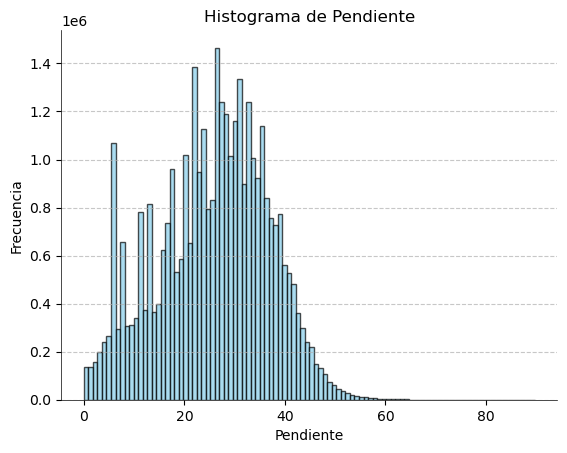

In [51]:
plt.hist(df['Pendiente'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Pendiente')
plt.xlabel('Pendiente')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()

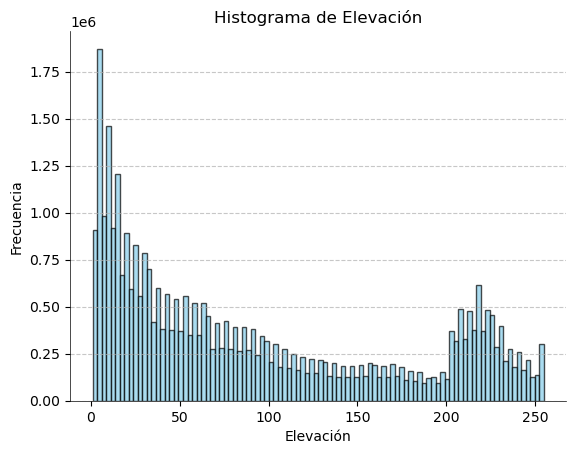

In [52]:
plt.hist(df['Elevación'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Elevación')
plt.xlabel('Elevación')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()

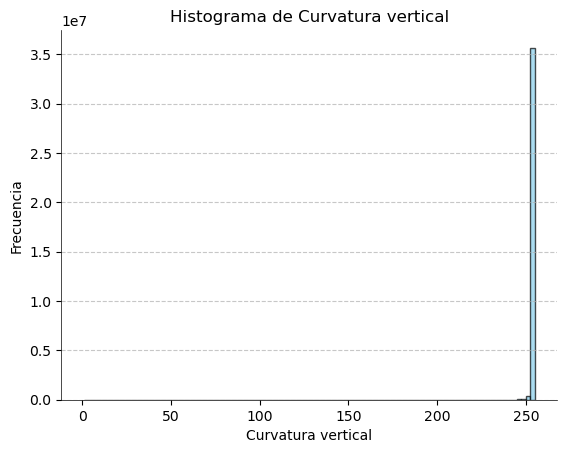

In [53]:
plt.hist(df['Curvatura vertical'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Curvatura vertical')
plt.xlabel('Curvatura vertical')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()


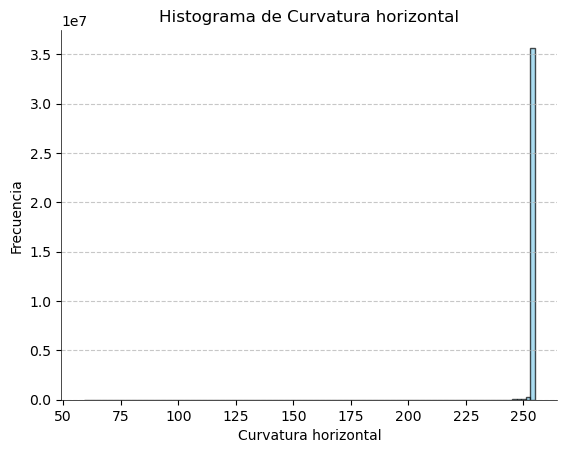

In [54]:
plt.hist(df['Curvatura horizontal'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Curvatura horizontal')
plt.xlabel('Curvatura horizontal')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()


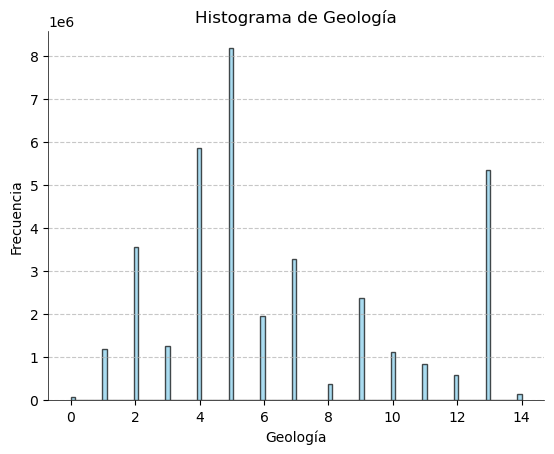

In [55]:
plt.hist(df['Geología'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Geología')
plt.xlabel('Geología')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()

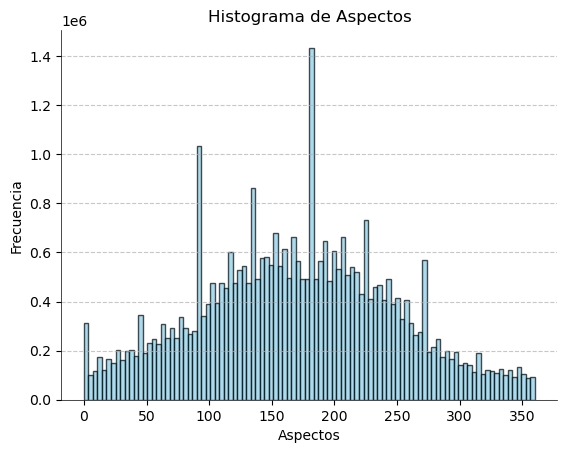

In [56]:
plt.hist(df['Aspectos'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Aspectos')
plt.xlabel('Aspectos')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()

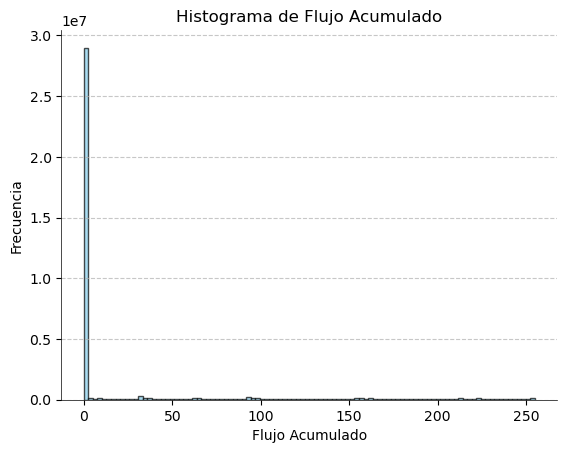

In [57]:
plt.hist(df['Flujo Acumulado'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Flujo Acumulado')
plt.xlabel('Flujo Acumulado')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()

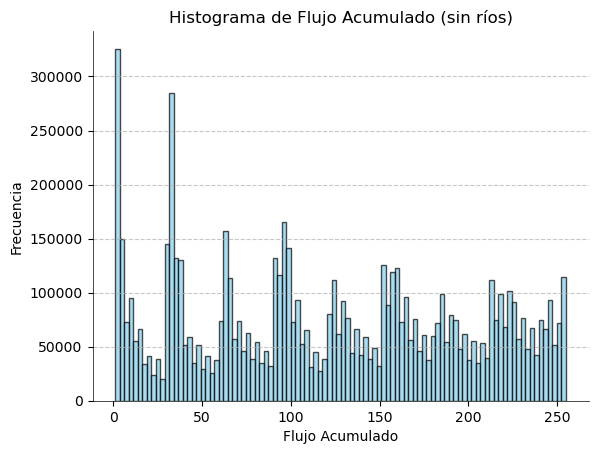

In [58]:
# Filtrar para excluir valores iguales a cero
flujo_filtrado = df[df['Flujo Acumulado'] > 0]['Flujo Acumulado']

plt.hist(flujo_filtrado, bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Flujo Acumulado (sin ríos)')
plt.xlabel('Flujo Acumulado')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()


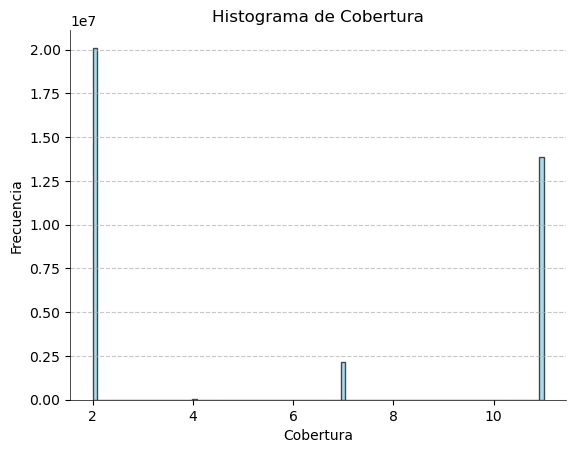

In [59]:
plt.hist(df['Cobertura'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Cobertura')
plt.xlabel('Cobertura')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()



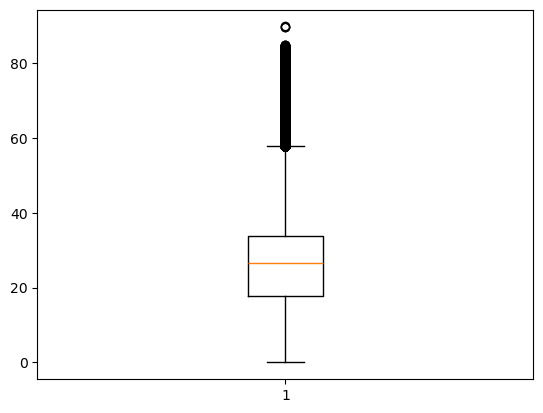

In [60]:
plt.boxplot(x='Pendiente', data=df);
#sns.boxplot(x='pendiente', data=df);


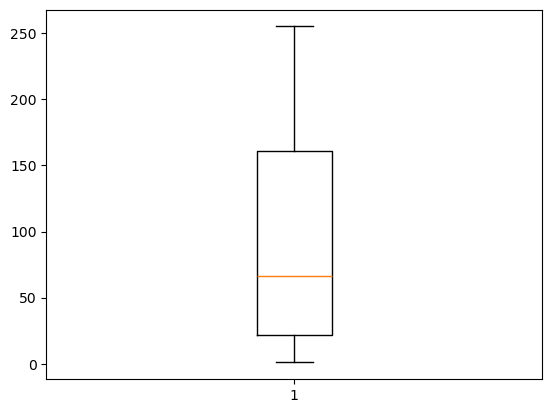

In [61]:
plt.boxplot(x='Elevación', data=df);
#sns.boxplot(x='pendiente', data=df);

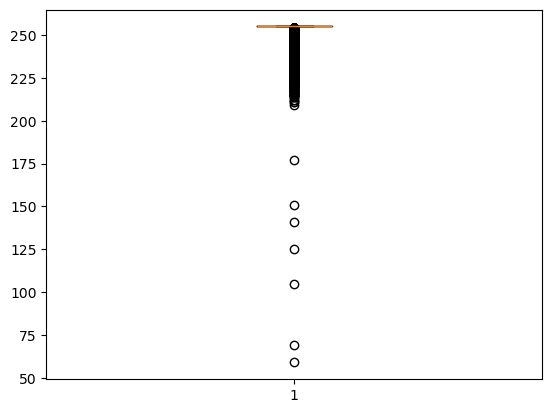

In [62]:
plt.boxplot(x='Curvatura horizontal', data=df);
#sns.boxplot(x='pendiente', data=df);

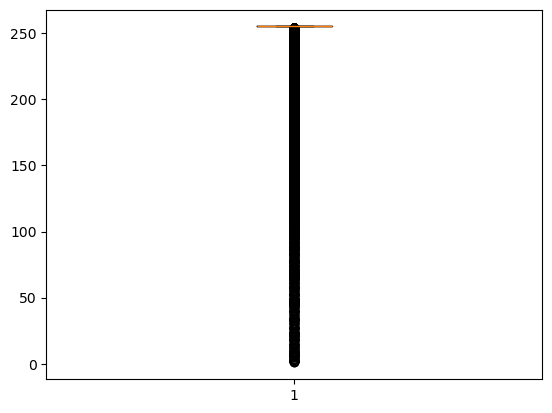

In [63]:
plt.boxplot(x='Curvatura vertical', data=df);
#sns.boxplot(x='pendiente', data=df);

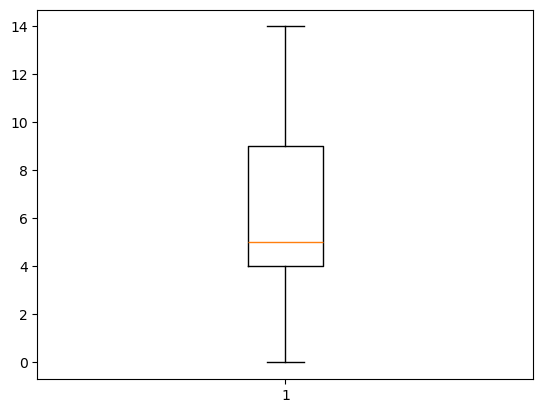

In [64]:
plt.boxplot(x='Geología', data=df);
#sns.boxplot(x='pendiente', data=df);

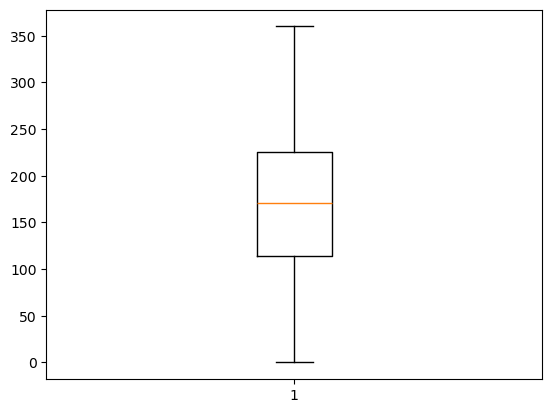

In [65]:
plt.boxplot(x='Aspectos', data=df);
#sns.boxplot(x='pendiente', data=df);

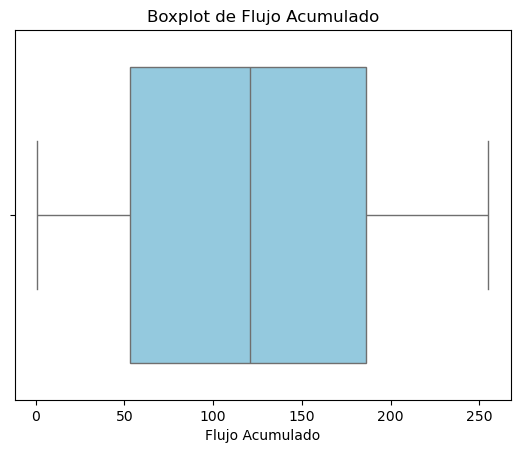

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar para eliminar ceros
df_filtrado = df[df['Flujo Acumulado'] > 0]

# Boxplot al estilo Seaborn (similar a tu ejemplo original)
sns.boxplot(x='Flujo Acumulado', data=df_filtrado, color='skyblue')
plt.title('Boxplot de Flujo Acumulado')
plt.xlabel('Flujo Acumulado')
plt.show()



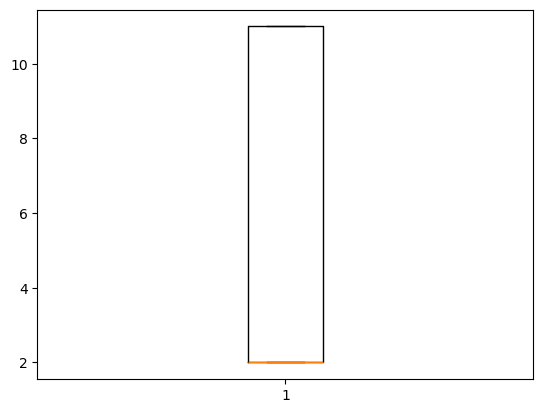

In [67]:
plt.boxplot(x='Cobertura', data=df);
#sns.boxplot(x='pendiente', data=df);

In [68]:
media=df.groupby('Inventario').mean()
print(media)

            Pendiente    Aspectos  Curvatura vertical  Curvatura horizontal  \
Inventario                                                                    
0           19.855640  160.449486          254.897467            254.946086   
1           25.908279  170.327099          254.871632            254.928908   

            Flujo Acumulado  Elevación  Geología  Cobertura  
Inventario                                                   
0                 31.275896  99.594704  4.520248   6.717210  
1                 24.677580  92.335615  6.575161   5.707127  


In [69]:
#Para contar el numero de celdas con y sin MenM
df['Inventario'].value_counts()

Inventario
1    34700294
0     1480603
Name: count, dtype: int64

In [70]:
landslides=df.Inventario.astype(bool)
si_lands=df[landslides]
no_lands=df[~landslides]

In [71]:
si_lands.count()

Inventario              34700294
Pendiente               34700294
Aspectos                34700294
Curvatura vertical      34700294
Curvatura horizontal    34700294
Flujo Acumulado         34700294
Elevación               34700294
Geología                34700294
Cobertura               34700294
dtype: int64

In [72]:
no_lands.count()

Inventario              1480603
Pendiente               1480603
Aspectos                1480603
Curvatura vertical      1480603
Curvatura horizontal    1480603
Flujo Acumulado         1480603
Elevación               1480603
Geología                1480603
Cobertura               1480603
dtype: int64

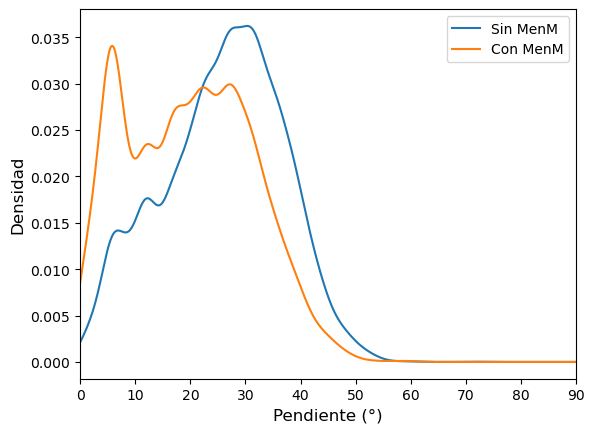

In [73]:
sample_si = si_lands['Pendiente'].dropna().sample(n=10000, random_state=42)
sample_no = no_lands['Pendiente'].dropna().sample(n=10000, random_state=42)

fig, ax = plt.subplots()
sample_si.plot.kde(ax=ax, label='Sin MenM')
sample_no.plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0, 90)
ax.set_xlabel('Pendiente (°)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize=10)
plt.show()

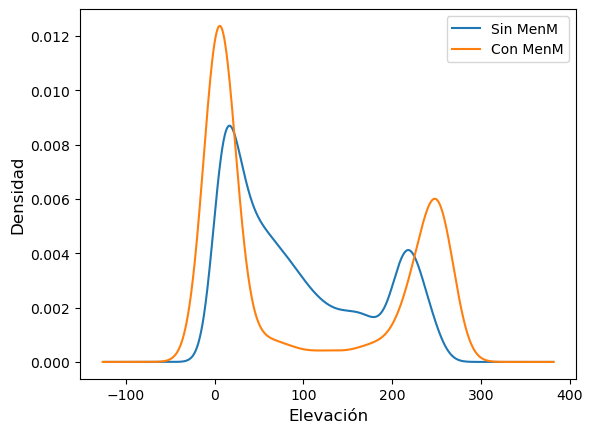

In [74]:
# Tomar una muestra representativa de 10,000 datos
sample_si = si_lands['Elevación'].dropna().sample(n=10000, random_state=42)
sample_no = no_lands['Elevación'].dropna().sample(n=10000, random_state=42)

# Graficar las curvas KDE
fig, ax = plt.subplots()
sample_si.plot.kde(ax=ax, label='Sin MenM')
sample_no.plot.kde(ax=ax, label='Con MenM')

# Etiquetas y estilo
# ax.set_xlim(0, 1500)  # Puedes descomentar esto si conoces el rango útil
ax.set_xlabel('Elevación', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize=10)
plt.show()

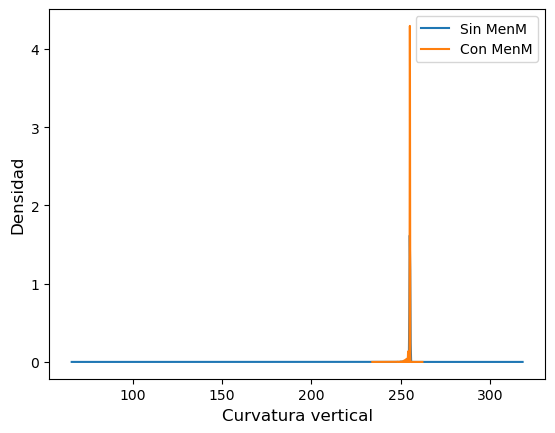

In [75]:
# Tomar una muestra representativa de 10,000 datos
sample_si = si_lands['Curvatura vertical'].dropna().sample(n=10000, random_state=42)
sample_no = no_lands['Curvatura vertical'].dropna().sample(n=10000, random_state=42)

# Graficar las curvas KDE
fig, ax = plt.subplots()
sample_si.plot.kde(ax=ax, label='Sin MenM')
sample_no.plot.kde(ax=ax, label='Con MenM')

# Estética del gráfico
# ax.set_xlim(-10, 10)  # Descomenta si lo necesitas
ax.set_xlabel('Curvatura vertical', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize=10)
plt.show()

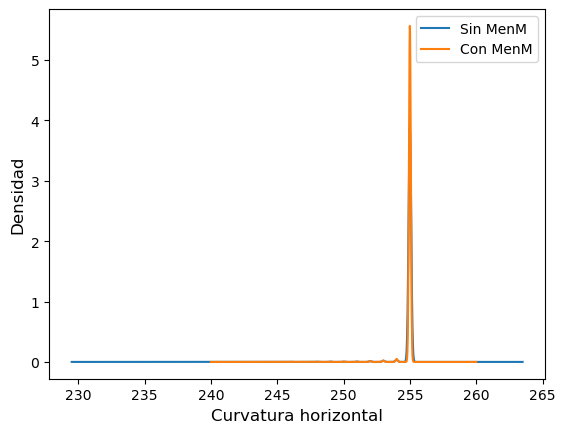

In [76]:
# Tomar una muestra representativa de 10,000 datos
sample_si = si_lands['Curvatura horizontal'].dropna().sample(n=10000, random_state=42)
sample_no = no_lands['Curvatura horizontal'].dropna().sample(n=10000, random_state=42)

# Graficar las curvas KDE
fig, ax = plt.subplots()
sample_si.plot.kde(ax=ax, label='Sin MenM')
sample_no.plot.kde(ax=ax, label='Con MenM')

# Estética del gráfico
# ax.set_xlim(-10, 10)  # Descomenta si lo necesitas
ax.set_xlabel('Curvatura horizontal', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize=10)
plt.show()

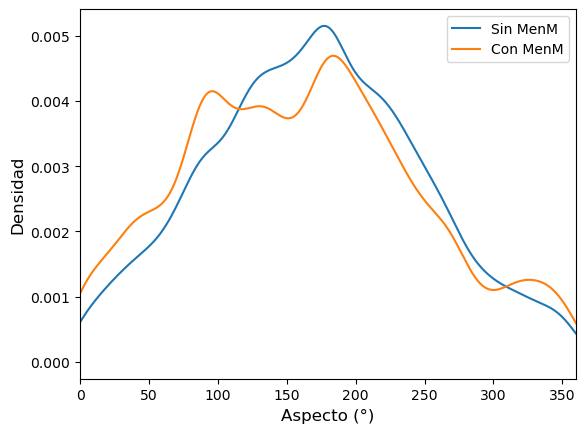

In [77]:
# Tomar una muestra representativa de 10.000 datos
sample_si = si_lands['Aspectos'].dropna().sample(n=10000, random_state=42)
sample_no = no_lands['Aspectos'].dropna().sample(n=10000, random_state=42)

# Graficar las curvas KDE
fig, ax = plt.subplots()
sample_si.plot.kde(ax=ax, label='Sin MenM')
sample_no.plot.kde(ax=ax, label='Con MenM')

# Estética del gráfico
ax.set_xlim(0, 360)
ax.set_xlabel('Aspecto (°)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize=10)
plt.show()

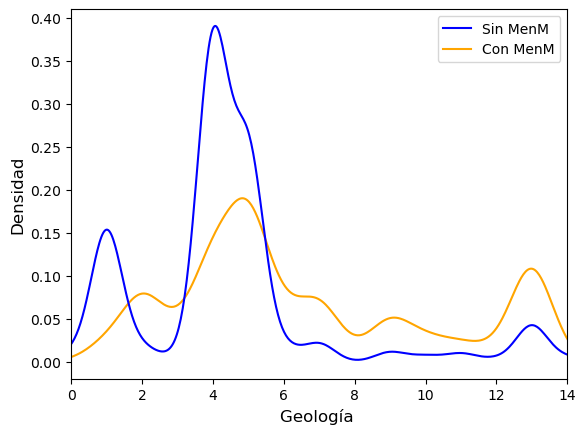

In [78]:
# Muestras aleatorias de 10,000 píxeles para Geología
sample_si = si_lands['Geología'].dropna().sample(n=10000, random_state=42)
sample_no = no_lands['Geología'].dropna().sample(n=10000, random_state=42)

# Crear gráfico de densidad
fig, ax = plt.subplots()
line_si = sample_si.plot.kde(ax=ax, label='Con MenM', color='orange')
line_no = sample_no.plot.kde(ax=ax, label='Sin MenM', color='blue')

# Personalización del gráfico
ax.set_xlim(min(sample_si.min(), sample_no.min()), max(sample_si.max(), sample_no.max()))
ax.set_xlabel('Geología ', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)

# Invertir el orden de la leyenda: Sin MenM arriba
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[1], handles[0]], [labels[1], labels[0]], loc=1, fontsize=10)

ax.tick_params('y', colors='k', labelsize=10)

plt.show()




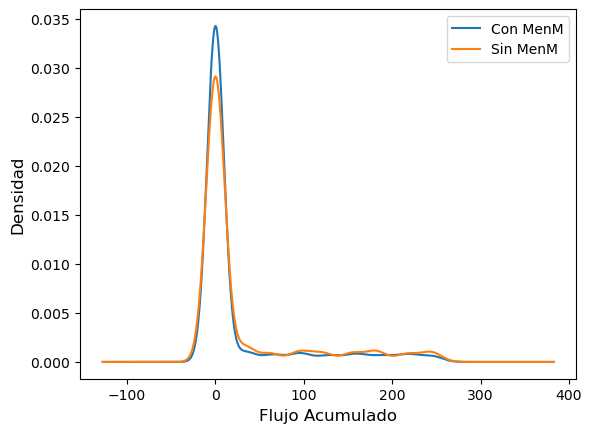

In [79]:
# Muestras aleatorias de 10,000 píxeles para Flujo Acumulado
sample_si = si_lands['Flujo Acumulado'].dropna().sample(n=10000, random_state=42)
sample_no = no_lands['Flujo Acumulado'].dropna().sample(n=10000, random_state=42)

# Crear gráfico de densidad
fig, ax = plt.subplots()
sample_si.plot.kde(ax=ax, label='Con MenM')
sample_no.plot.kde(ax=ax, label='Sin MenM')

# Personalización del gráfico
ax.set_xlabel('Flujo Acumulado', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize=10)

plt.show()


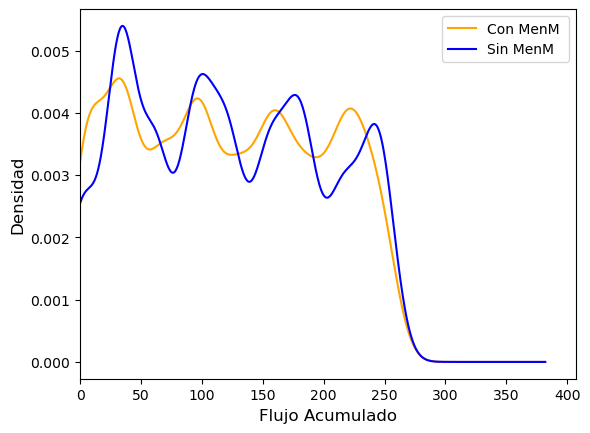

In [80]:
# Filtrar para que no incluya valores de Flujo Acumulado menores o iguales a cero
sample_si = si_lands[si_lands['Flujo Acumulado'] >= 1]['Flujo Acumulado'].dropna().sample(n=10000, random_state=42)
sample_no = no_lands[no_lands['Flujo Acumulado'] >= 1]['Flujo Acumulado'].dropna().sample(n=10000, random_state=42)

# Crear gráfico de densidad
fig, ax = plt.subplots()
sample_si.plot.kde(ax=ax, label='Con MenM ', color='orange')
sample_no.plot.kde(ax=ax, label='Sin MenM ', color='blue')

# Personalización del gráfico
ax.set_xlim(left=0)  # Limitar el eje x para que inicie en 0
ax.set_xlabel('Flujo Acumulado', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize=10)

plt.show()



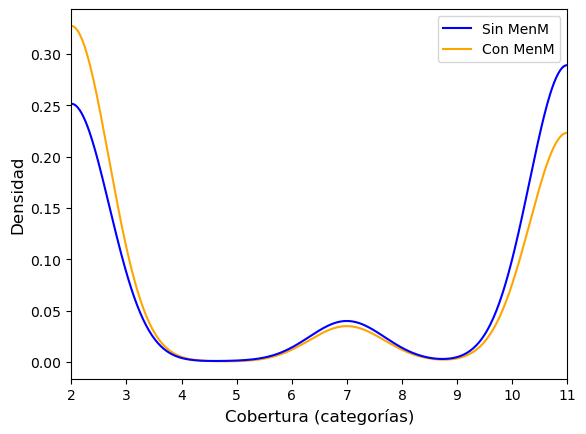

In [81]:
# Muestras aleatorias de 10,000 píxeles para Cobertura
sample_si = si_lands['Cobertura'].dropna().sample(n=10000, random_state=42)
sample_no = no_lands['Cobertura'].dropna().sample(n=10000, random_state=42)

# Crear gráfico de densidad
fig, ax = plt.subplots()
line_si = sample_si.plot.kde(ax=ax, label='Con MenM', color='orange')
line_no = sample_no.plot.kde(ax=ax, label='Sin MenM', color='blue')

# Personalización del gráfico
ax.set_xlim(min(sample_si.min(), sample_no.min()), max(sample_si.max(), sample_no.max()))
ax.set_xlabel('Cobertura (categorías)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)

# Invertir el orden de la leyenda: Sin MenM arriba
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[1], handles[0]], [labels[1], labels[0]], loc=1, fontsize=10)

ax.tick_params('y', colors='k', labelsize=10)

plt.show()


In [85]:
MatCorre=DataFrame(df.corr())
smg.plot_corr(MatCorre, xnames=list(MatCorre.columns)) ;

MemoryError: Unable to allocate 2.43 GiB for an array with shape (9, 36180897) and data type float64

In [86]:
#se importan todas las librerias a utilizar
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

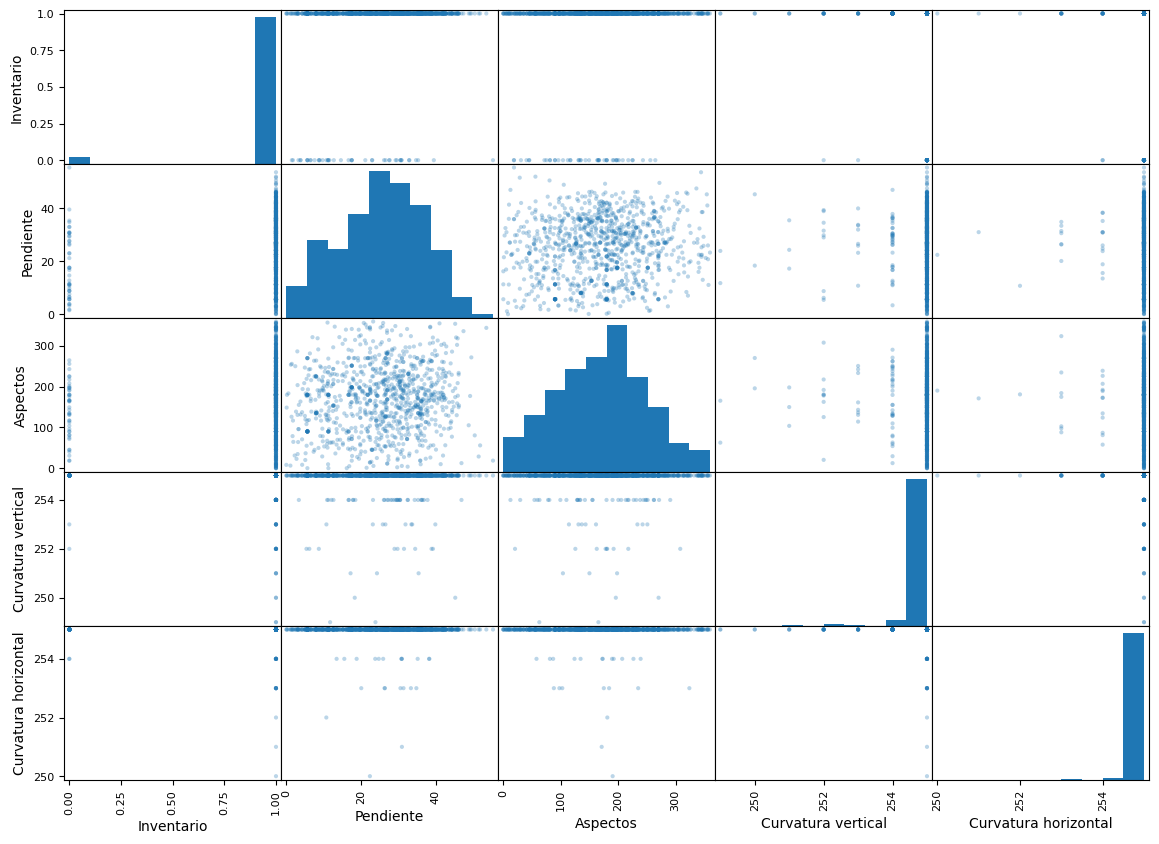

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame original

# Reducimos el tamaño del DataFrame a una muestra representativa (por ejemplo, 1000 filas)
df_sample = df.sample(n=1000, random_state=42)

# Seleccionamos solo un subconjunto de las columnas, si es necesario
# Por ejemplo, seleccionando las primeras 5 columnas
df_reducido = df_sample.iloc[:, :5]

# Generamos la matriz de dispersión con histogramas en la diagonal
pd.plotting.scatter_matrix(df_reducido, alpha=0.3, figsize=(14, 10), diagonal='hist')

# Mostramos el gráfico
plt.show()

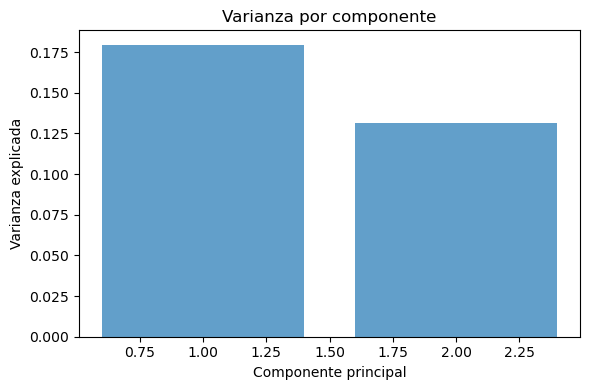

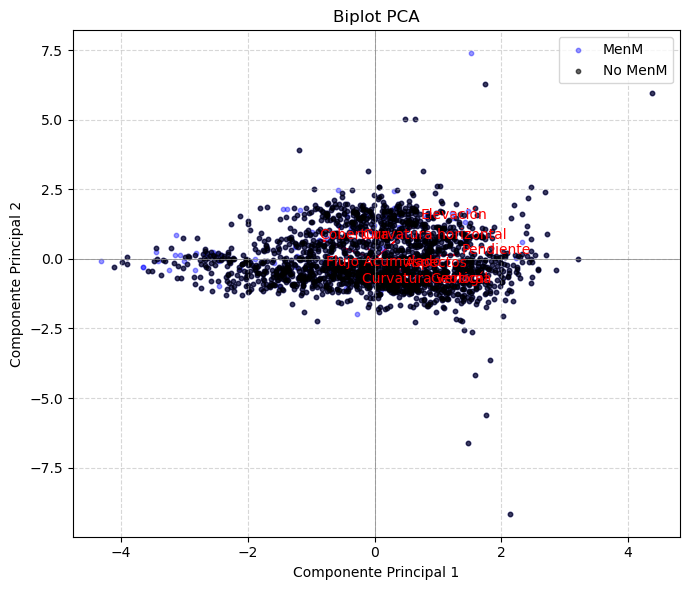

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Se toma una muestra para reducir carga si hay muchos datos (ajusta n si es necesario)
df_sample = df.sample(n=2000, random_state=42) if len(df) > 2000 else df.copy()

# Se guarda la columna de puntos y se eliminan del DataFrame
puntos = df_sample['Inventario'].copy()
df_sample.drop('Inventario', axis=1, inplace=True)

# Escalado de los datos
df_scaled = pd.DataFrame(scale(df_sample), columns=df_sample.columns)

# PCA
pca = PCA(n_components=2)  # Solo 2 componentes principales
pca_result = pca.fit_transform(df_scaled)

# Gráfica de varianza explicada
plt.figure(figsize=(6, 4))
plt.bar([1, 2], pca.explained_variance_ratio_, alpha=0.7)
plt.xlabel('Componente principal')
plt.ylabel('Varianza explicada')
plt.title('Varianza por componente')
plt.tight_layout()
plt.show()

# Biplot simplificado
xvector = pca.components_[0]
yvector = pca.components_[1]
xs = pca_result[:, 0]
ys = pca_result[:, 1]

# Enmascaramos puntos con condición
mask1 = np.ma.masked_where(puntos < 1, xs)
mask2 = np.ma.masked_where(puntos < 1, ys)

plt.figure(figsize=(7, 6))

# Proyección de variables
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*2, yvector[i]*2, color='red', width=0.005, head_width=0.05)
    plt.text(xvector[i]*2.2, yvector[i]*2.2, df_scaled.columns[i], color='red', fontsize=10)

# Puntos proyectados
plt.scatter(xs, ys, s=10, c='blue', alpha=0.4, label='MenM')
plt.scatter(mask1, mask2, s=10, c='black', alpha=0.6, label='No MenM')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Biplot PCA')
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

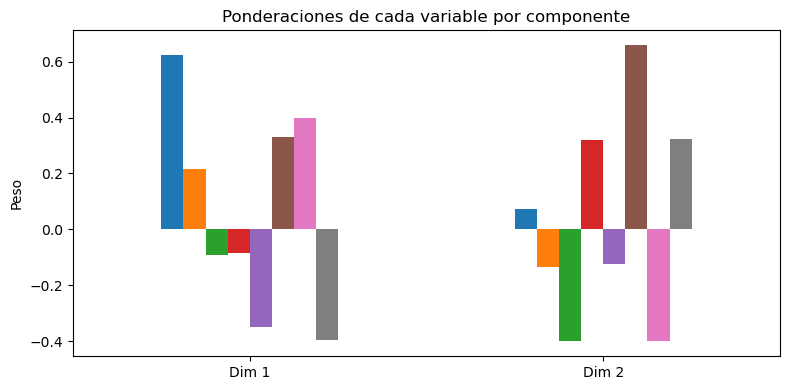

In [89]:
def pca_results_light(data, pca):
    dimensions = ['Dim {}'.format(i+1) for i in range(pca.n_components_)]

    components = pd.DataFrame(np.round(pca.components_, 3), columns=data.columns)
    components.index = dimensions

    variance_ratios = pd.DataFrame({
        'Explained Variance': np.round(pca.explained_variance_ratio_, 3)
    }, index=dimensions)

    # Solo graficamos si hay pocas dimensiones
    if pca.n_components_ <= 5:
        fig, ax = plt.subplots(figsize=(8, 4))
        components.plot(kind='bar', ax=ax, legend=False)
        ax.set_title('Ponderaciones de cada variable por componente')
        ax.set_ylabel('Peso')
        ax.set_xticklabels(dimensions, rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print("Demasiadas dimensiones para graficar de forma eficiente.")

    return pd.concat([variance_ratios, components], axis=1)

# Llamar función
resultados_pca = pca_results_light(df_scaled, pca)

In [90]:
import numpy as np

# Acceder a la columna 'Inventario' del DataFrame
inventario_array = df['Inventario'].to_numpy()

# Contar los valores únicos
valores, conteos = np.unique(inventario_array, return_counts=True)

# Mostrar resultados
print("Conteo de píxeles:")
print(f"Píxeles con valor 0: {conteos[valores == 0][0] if 0 in valores else 0}")
print(f"Píxeles con valor 1: {conteos[valores == 1][0] if 1 in valores else 0}")



Conteo de píxeles:
Píxeles con valor 0: 1480603
Píxeles con valor 1: 34700294


In [91]:
import numpy as np

# Definir condiciones para los rangos de pendiente
condiciones = [
    (df['Pendiente'] >= 0) & (df['Pendiente'] <= 5),
    (df['Pendiente'] > 5) & (df['Pendiente'] <= 15),
    (df['Pendiente'] > 15) & (df['Pendiente'] <= 30),
    (df['Pendiente'] > 30)
]

# Etiquetas numéricas (pueden ser también texto si prefieres)
valores = [1, 2, 3, 4]  # 1: baja, 2: media, 3: alta, 4: muy alta

# Crear nueva columna en el DataFrame
df['Pendiente_reclas'] = np.select(condiciones, valores, default=np.nan)

In [92]:
import pandas as pd

# Crear máscaras
baja = df['Pendiente_reclas'] == 1
no_baja = df['Pendiente_reclas'].isin([2, 3, 4])
inventario_si = df['Inventario'] == 1
inventario_no = df['Inventario'] == 0

# Calcular los valores
a = ((baja) & (inventario_si)).sum()  # Pendiente baja e inventario sí
b = ((no_baja) & (inventario_si)).sum()  # Otras pendientes e inventario sí
c = ((baja) & (inventario_no)).sum()  # Pendiente baja e inventario no
d = ((no_baja) & (inventario_no)).sum()  # Otras pendientes e inventario no

# Crear el DataFrame con la matriz
matriz = pd.DataFrame({
    'Pendiente baja': [a, c],
    'No clase (media+alta+muy alta)': [b, d]
}, index=['Inventario = sí', 'Inventario = no'])

# Mostrar la matriz
print(matriz)


                 Pendiente baja  No clase (media+alta+muy alta)
Inventario = sí          876310                        33823984
Inventario = no          134676                         1345927


In [93]:
import pandas as pd
import numpy as np

def construir_matriz(df, columna_reclas, clase_objetivo):
    """
    Construye una matriz 2x2 cruzando clase_objetivo con Inventario (1 o 0).
    Usa valores numéricos como en la reclasificación original.
    """
    es_objetivo = df[columna_reclas] == clase_objetivo
    no_objetivo = (df[columna_reclas] != clase_objetivo) & (~df[columna_reclas].isna())
    inventario_si = df['Inventario'] == 1
    inventario_no = df['Inventario'] == 0

    a = ((es_objetivo) & (inventario_si)).sum()
    b = ((no_objetivo) & (inventario_si)).sum()
    c = ((es_objetivo) & (inventario_no)).sum()
    d = ((no_objetivo) & (inventario_no)).sum()

    return pd.DataFrame({
        f'{columna_reclas} = {clase_objetivo}': [a, c],
        f'{columna_reclas} ≠ {clase_objetivo}': [b, d]
    }, index=['Inventario = sí', 'Inventario = no'])

# Variable reclasificada
columna = 'Pendiente_reclas'

# Lista de clases según tus valores: 1 (baja), 2 (media), 3 (alta), 4 (muy alta)
clases = [1, 2, 3, 4]

# Crear y mostrar todas las matrices
for clase in clases:
    print(f'\n📊 Matriz para clase: {clase} en {columna}')
    matriz = construir_matriz(df, columna, clase_objetivo=clase)
    print(matriz)




📊 Matriz para clase: 1 en Pendiente_reclas
                 Pendiente_reclas = 1  Pendiente_reclas ≠ 1
Inventario = sí                876310              33823984
Inventario = no                134676               1345927

📊 Matriz para clase: 2 en Pendiente_reclas
                 Pendiente_reclas = 2  Pendiente_reclas ≠ 2
Inventario = sí               5318347              29381947
Inventario = no                401607               1078996

📊 Matriz para clase: 3 en Pendiente_reclas
                 Pendiente_reclas = 3  Pendiente_reclas ≠ 3
Inventario = sí              14982354              19717940
Inventario = no                631855                848748

📊 Matriz para clase: 4 en Pendiente_reclas
                 Pendiente_reclas = 4  Pendiente_reclas ≠ 4
Inventario = sí              13523283              21177011
Inventario = no                312465               1168138


In [94]:
import numpy as np

# Definir condiciones para los rangos de elevación
condiciones_elevacion = [
    (df['Elevación'] >= 0) & (df['Elevación'] <= 10),     # Muy baja
    (df['Elevación'] > 10) & (df['Elevación'] <= 90),     # Media
    (df['Elevación'] > 90) & (df['Elevación'] <= 200),    # Alta
    (df['Elevación'] > 200) & (df['Elevación'] <= 300),   # Muy alta
    (df['Elevación'] > 300)                               # Altísima
]

# Etiquetas numéricas: 1 = muy baja, ..., 5 = altísima
valores_elevacion = [1, 2, 3, 4, 5]

# Crear nueva columna en el DataFrame
df['Elevacion_reclas'] = np.select(condiciones_elevacion, valores_elevacion, default=np.nan)


In [95]:
import pandas as pd

def construir_matriz_elevacion(df, columna_reclas, clase_objetivo):
    """
    Construye una matriz 2x2 cruzando clase_objetivo con Inventario (1 o 0)
    usando la columna reclasificada de elevación.
    """
    es_objetivo = df[columna_reclas] == clase_objetivo
    no_objetivo = (df[columna_reclas] != clase_objetivo) & (~df[columna_reclas].isna())
    inventario_si = df['Inventario'] == 1
    inventario_no = df['Inventario'] == 0

    a = ((es_objetivo) & (inventario_si)).sum()
    b = ((no_objetivo) & (inventario_si)).sum()
    c = ((es_objetivo) & (inventario_no)).sum()
    d = ((no_objetivo) & (inventario_no)).sum()

    return pd.DataFrame({
        f'{columna_reclas} = {clase_objetivo}': [a, c],
        f'{columna_reclas} ≠ {clase_objetivo}': [b, d]
    }, index=['Inventario = sí', 'Inventario = no'])

# Definir la columna reclasificada
columna = 'Elevacion_reclas'

# Clases definidas según tu reclasificación (1 a 5)
clases = [1, 2, 3, 4, 5]

# Crear y mostrar todas las matrices para cada clase de elevación
for clase in clases:
    print(f'\n📊 Matriz para clase: {clase} en {columna}')
    matriz = construir_matriz_elevacion(df, columna, clase_objetivo=clase)
    print(matriz)



📊 Matriz para clase: 1 en Elevacion_reclas
                 Elevacion_reclas = 1  Elevacion_reclas ≠ 1
Inventario = sí               4074449              30625845
Inventario = no                673957                806646

📊 Matriz para clase: 2 en Elevacion_reclas
                 Elevacion_reclas = 2  Elevacion_reclas ≠ 2
Inventario = sí              16526776              18173518
Inventario = no                215164               1265439

📊 Matriz para clase: 3 en Elevacion_reclas
                 Elevacion_reclas = 3  Elevacion_reclas ≠ 3
Inventario = sí               7724699              26975595
Inventario = no                 68779               1411824

📊 Matriz para clase: 4 en Elevacion_reclas
                 Elevacion_reclas = 4  Elevacion_reclas ≠ 4
Inventario = sí               6374370              28325924
Inventario = no                522703                957900

📊 Matriz para clase: 5 en Elevacion_reclas
                 Elevacion_reclas = 5  Elevacion_reclas ≠ 5


In [96]:
import numpy as np
import pandas as pd

# Definir condiciones para los rangos de Aspectos
condiciones_aspectos = [
    (df['Aspectos'] >= 0) & (df['Aspectos'] <= 60),      # Intermedio
    (df['Aspectos'] > 60) & (df['Aspectos'] <= 230),     # Favorable
    (df['Aspectos'] > 230) & (df['Aspectos'] <= 360)     # Menos relevante
]

# Etiquetas numéricas para la reclasificación
valores_aspectos = [1, 2, 3]  # 1 = Intermedio, 2 = Favorable, 3 = Menos relevante

# Crear nueva columna reclasificada en el DataFrame
df['Aspectos_reclas'] = np.select(condiciones_aspectos, valores_aspectos, default=np.nan)

# Función para construir matriz 2x2 cruzando clase con Inventario
def construir_matriz(df, columna_reclas, clase_objetivo):
    es_objetivo = df[columna_reclas] == clase_objetivo
    no_objetivo = (df[columna_reclas] != clase_objetivo) & (~df[columna_reclas].isna())
    inventario_si = df['Inventario'] == 1
    inventario_no = df['Inventario'] == 0

    a = ((es_objetivo) & (inventario_si)).sum()
    b = ((no_objetivo) & (inventario_si)).sum()
    c = ((es_objetivo) & (inventario_no)).sum()
    d = ((no_objetivo) & (inventario_no)).sum()

    return pd.DataFrame({
        f'{columna_reclas} = {clase_objetivo}': [a, c],
        f'{columna_reclas} ≠ {clase_objetivo}': [b, d]
    }, index=['Inventario = sí', 'Inventario = no'])

# Lista de clases según tu reclasificación
clases = [1, 2, 3]

# Columna reclasificada
columna = 'Aspectos_reclas'

# Mostrar matrices para cada clase
for clase in clases:
    print(f'\n📊 Matriz para clase: {clase} en {columna}')
    matriz = construir_matriz(df, columna, clase_objetivo=clase)
    print(matriz)



📊 Matriz para clase: 1 en Aspectos_reclas
                 Aspectos_reclas = 1  Aspectos_reclas ≠ 1
Inventario = sí              3067411             31632883
Inventario = no               187334              1293269

📊 Matriz para clase: 2 en Aspectos_reclas
                 Aspectos_reclas = 2  Aspectos_reclas ≠ 2
Inventario = sí             23656371             11043923
Inventario = no               992639               487964

📊 Matriz para clase: 3 en Aspectos_reclas
                 Aspectos_reclas = 3  Aspectos_reclas ≠ 3
Inventario = sí              7976512             26723782
Inventario = no               300630              1179973


In [97]:
import numpy as np
import pandas as pd

# Clasificación del Flujo Acumulado
condiciones_flujo = [
    (df['Flujo Acumulado'] >= 1) & (df['Flujo Acumulado'] <= 50),      # Bajo
    (df['Flujo Acumulado'] > 50) & (df['Flujo Acumulado'] <= 150),     # Medio
    (df['Flujo Acumulado'] > 150) & (df['Flujo Acumulado'] <= 200),    # Alto
    (df['Flujo Acumulado'] > 200) | (df['Flujo Acumulado'] == 0)       # Muy alto
]

# Valores numéricos para las clases
valores_flujo = [1, 2, 3, 4]  # 1 = Bajo, 2 = Medio, 3 = Alto, 4 = Muy alto

# Crear nueva columna reclasificada en el DataFrame
df['FlujoAcum_reclas'] = np.select(condiciones_flujo, valores_flujo, default=np.nan)

# Función para construir matriz 2x2
def construir_matriz(df, columna_reclas, clase_objetivo):
    es_objetivo = df[columna_reclas] == clase_objetivo
    no_objetivo = (df[columna_reclas] != clase_objetivo) & (~df[columna_reclas].isna())
    inventario_si = df['Inventario'] == 1
    inventario_no = df['Inventario'] == 0

    a = ((es_objetivo) & (inventario_si)).sum()
    b = ((no_objetivo) & (inventario_si)).sum()
    c = ((es_objetivo) & (inventario_no)).sum()
    d = ((no_objetivo) & (inventario_no)).sum()

    return pd.DataFrame({
        f'{columna_reclas} = {clase_objetivo}': [a, c],
        f'{columna_reclas} ≠ {clase_objetivo}': [b, d]
    }, index=['Inventario = sí', 'Inventario = no'])

# Lista de clases
clases = [1, 2, 3, 4]

# Columna clasificada
columna = 'FlujoAcum_reclas'

# Mostrar matrices para cada clase
for clase in clases:
    print(f'\n📊 Matriz para clase: {clase} en {columna}')
    matriz = construir_matriz(df, columna, clase_objetivo=clase)
    print(matriz)



📊 Matriz para clase: 1 en FlujoAcum_reclas
                 FlujoAcum_reclas = 1  FlujoAcum_reclas ≠ 1
Inventario = sí               1737089              32963205
Inventario = no                 87733               1392870

📊 Matriz para clase: 2 en FlujoAcum_reclas
                 FlujoAcum_reclas = 2  FlujoAcum_reclas ≠ 2
Inventario = sí               2517412              32182882
Inventario = no                126878               1353725

📊 Matriz para clase: 3 en FlujoAcum_reclas
                 FlujoAcum_reclas = 3  FlujoAcum_reclas ≠ 3
Inventario = sí               1384759              33315535
Inventario = no                 83522               1397081

📊 Matriz para clase: 4 en FlujoAcum_reclas
                 FlujoAcum_reclas = 4  FlujoAcum_reclas ≠ 4
Inventario = sí              29061034               5639260
Inventario = no               1182470                298133


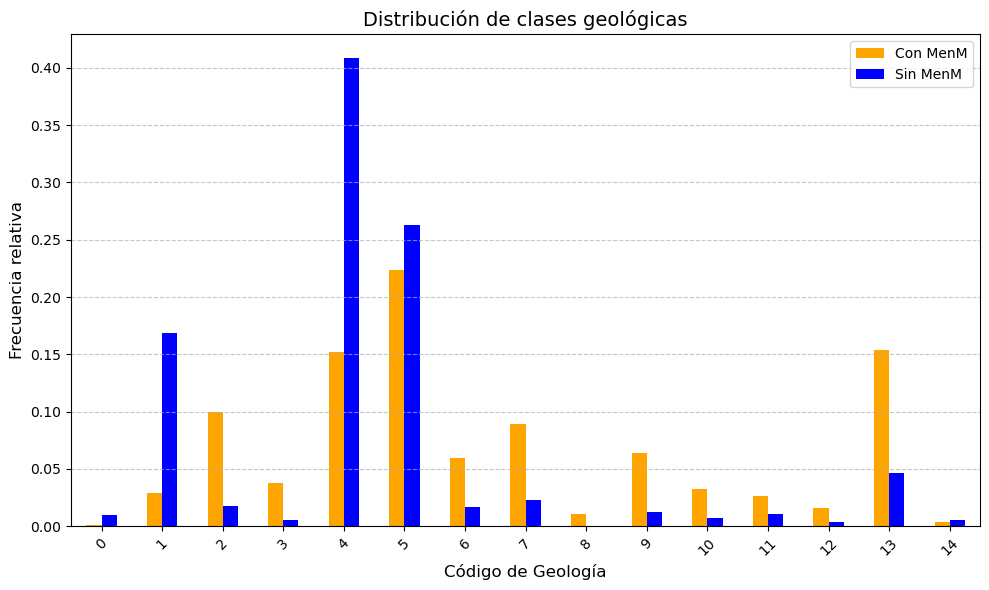

In [98]:
import matplotlib.pyplot as plt
import pandas as pd

# Muestras aleatorias de 10,000 píxeles para Geología
sample_si = si_lands['Geología'].dropna().sample(n=10000, random_state=42)
sample_no = no_lands['Geología'].dropna().sample(n=10000, random_state=42)

# Contar frecuencia de cada clase geológica en ambas muestras
counts_si = sample_si.value_counts(normalize=True).sort_index()
counts_no = sample_no.value_counts(normalize=True).sort_index()

# Unir en un DataFrame para graficar lado a lado
df_freq = pd.DataFrame({
    'Con MenM': counts_si,
    'Sin MenM': counts_no
}).fillna(0)

# Crear gráfico de barras
ax = df_freq.plot(kind='bar', figsize=(10, 6), color=['orange', 'blue'])

# Personalización del gráfico
ax.set_xlabel('Código de Geología', fontsize=12)
ax.set_ylabel('Frecuencia relativa', fontsize=12)
ax.set_title('Distribución de clases geológicas', fontsize=14)
ax.legend(loc='upper right', fontsize=10)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


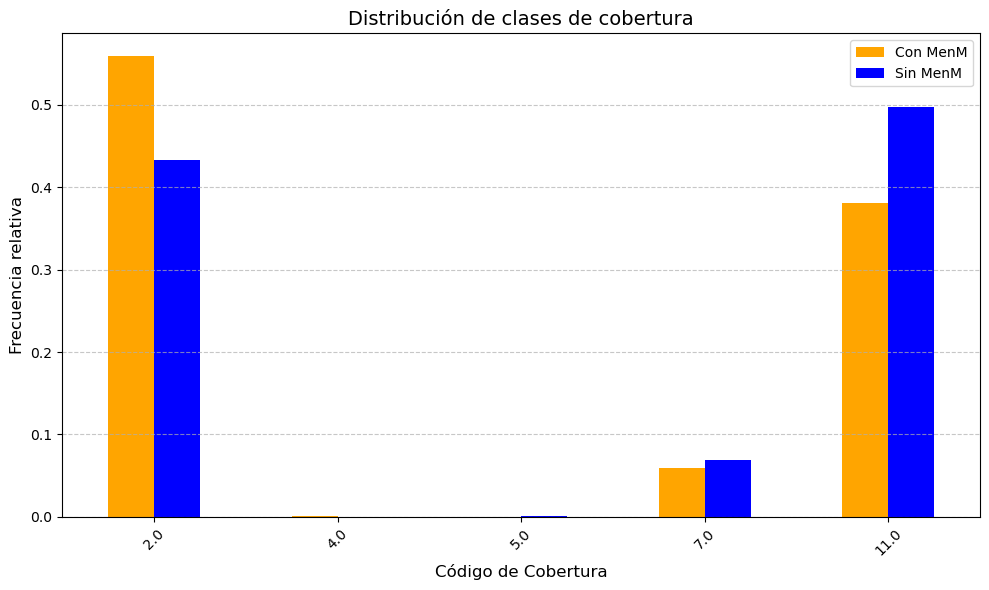

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

# Muestras aleatorias de 10,000 píxeles para Cobertura
sample_si = si_lands['Cobertura'].dropna().sample(n=10000, random_state=42)
sample_no = no_lands['Cobertura'].dropna().sample(n=10000, random_state=42)

# Contar frecuencia relativa por clase de cobertura
counts_si = sample_si.value_counts(normalize=True).sort_index()
counts_no = sample_no.value_counts(normalize=True).sort_index()

# Crear DataFrame conjunto
df_cobertura = pd.DataFrame({
    'Con MenM': counts_si,
    'Sin MenM': counts_no
}).fillna(0)

# Gráfico de barras
ax = df_cobertura.plot(kind='bar', figsize=(10, 6), color=['orange', 'blue'])

# Personalización del gráfico
ax.set_xlabel('Código de Cobertura', fontsize=12)
ax.set_ylabel('Frecuencia relativa', fontsize=12)
ax.set_title('Distribución de clases de cobertura', fontsize=14)
ax.legend(loc='upper right', fontsize=10)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
